# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Regressão LOESS</font>

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Imports
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy      : 1.26.4
statsmodels: 0.14.1
matplotlib : 3.8.2



## Regressão LOESS

### Exemplo 1

Neste exemplo, geramos dados com uma relação não linear entre as variáveis x e y. Aplicamos a Regressão LOESS usando a função lowess da biblioteca statsmodels com uma largura de banda (frac) de 0.3, que determina a proporção de pontos vizinhos usados no ajuste local. Em seguida, usamos a biblioteca Matplotlib para visualizar os dados e a curva ajustada pela regressão LOESS.

In [5]:
# Gera dados com uma relação não linear
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale = 0.3, size = 100)

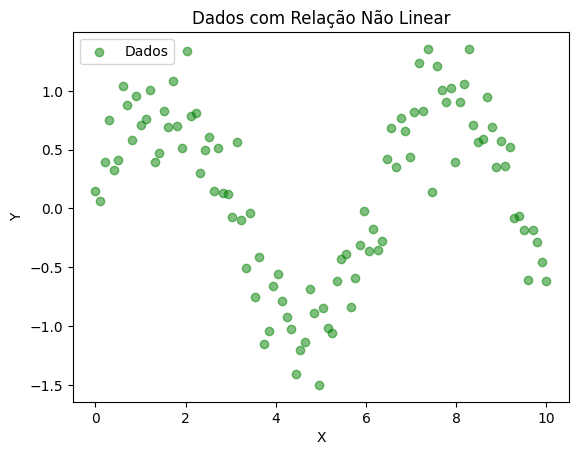

In [6]:
# Visualiza os dados
plt.scatter(x, y, label = "Dados", alpha = 0.5, color = 'green')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dados com Relação Não Linear")
plt.legend()
plt.show()

In [7]:
# Aplica a regressão LOESS
modelo = lowess(y, x, frac = 0.3)

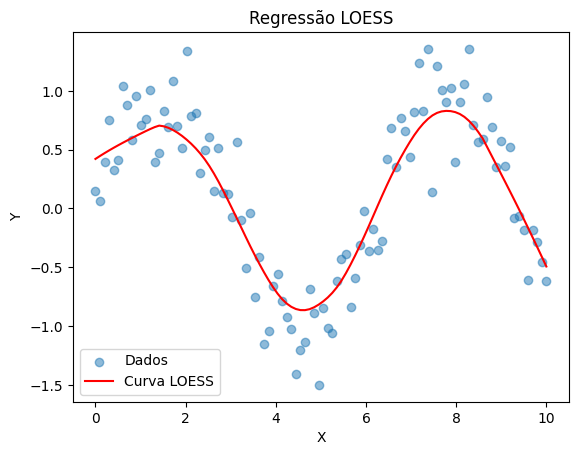

In [8]:
# Visualiza os dados e a curva ajustada
plt.scatter(x, y, label = "Dados", alpha = 0.5)
plt.plot(modelo[:, 0], modelo[:, 1], color = 'red', label = "Curva LOESS")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regressão LOESS")
plt.legend()

### Exemplo 2

Vamos criar um exemplo fictício de previsão do aumento nas vendas a partir da mudança de preço usando regressão LOESS em Python. Primeiro, geraremos dados artificiais e, em seguida, aplicaremos a regressão LOESS para ajustar a curva aos dados.

Neste exemplo, geramos dados artificiais utilizando a função gerar_dados, que simula o aumento nas vendas a partir da mudança de preço com base em uma função quadrática e adiciona ruído gaussiano.

Aplicamos a regressão LOESS usando a função lowess da biblioteca statsmodels com uma largura de banda (frac) de 0.3, que determina a proporção de pontos vizinhos usados no ajuste local.

Em seguida, usamos a biblioteca Matplotlib para visualizar os dados e a curva ajustada pela regressão LOESS. Neste exemplo, a regressão LOESS é capaz de capturar a relação não linear entre a mudança de preço e o aumento nas vendas. Note que este é um exemplo fictício e os dados foram gerados artificialmente. Em casos reais, você deve utilizar dados coletados a partir de observações reais para aplicar a regressão LOESS e fazer previsões.

In [9]:
# Função para gerar dados artificiais
def gerar_dados(seed, tamanho):
    np.random.seed(seed)
    x = np.linspace(0, 10, 100)
    y = np.sin(x) + np.random.normal(scale = 0.3, size = 100)
    return x, y

In [10]:
# Gera os dados
mudanca_preco, aumento_vendas = gerar_dados(42, 100)

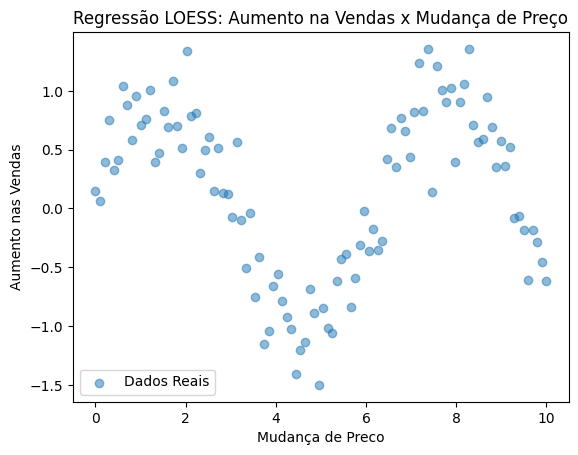

In [11]:
# Visualiza os dados e a curva ajustada
plt.scatter(mudanca_preco, aumento_vendas, label="Dados Reais", alpha=0.5)
plt.xlabel("Mudança de Preco")
plt.ylabel("Aumento nas Vendas")
plt.title("Regressão LOESS: Aumento na Vendas x Mudança de Preço")
plt.legend()
plt.show()

In [19]:
# Aplica a regressão LOESS
suavizado = lowess(aumento_vendas, mudanca_preco, frac = 0.3)

In [20]:
# Amostra dos dados
suavizado[40:45]

array([[ 4.04040404, -0.72524567],
       [ 4.14141414, -0.77200447],
       [ 4.24242424, -0.80917505],
       [ 4.34343434, -0.83683105],
       [ 4.44444444, -0.85527331]])

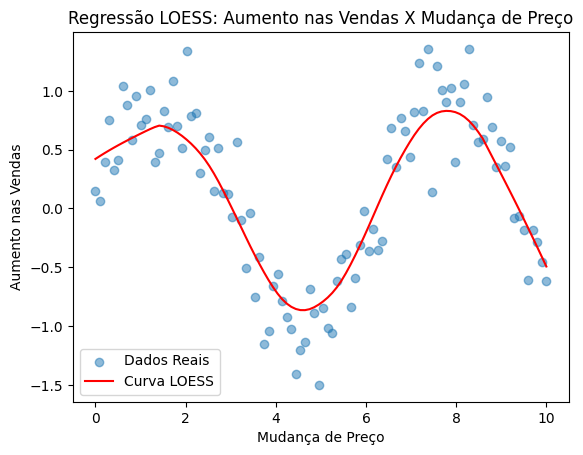

In [21]:
# Visualiza os dados e a curva ajustada
plt.scatter(mudanca_preco, aumento_vendas, label = "Dados Reais", alpha = 0.5)
plt.plot(suavizado[:, 0], suavizado[:, 1], color = "red", label = "Curva LOESS")
plt.xlabel("Mudança de Preço")
plt.ylabel("Aumento nas Vendas")
plt.title("Regressão LOESS: Aumento nas Vendas X Mudança de Preço")
plt.legend()
plt.show()

### Exemplo 3

A função lowess do pacote Statsmodels retorna um conjunto de pontos suavizados, em vez de um modelo ajustável como acontece com outras bibliotecas. Dessa forma, para fazer previsões em novos pontos, você precisará usar interpolação nos pontos suavizados.

Em vez disso, você pode usar a biblioteca Scikit-learn para criar e fazer previsões com um modelo de regressão LOESS. O Scikit-learn possui uma implementação de LOESS chamada KernelRidge com um kernel específico chamado "RBF" (Radial basis function) que pode ser usado para realizar um ajuste similar ao LOESS.

Aqui está um exemplo de como criar e fazer previsões com um modelo de regressão LOESS usando o Scikit-learn:

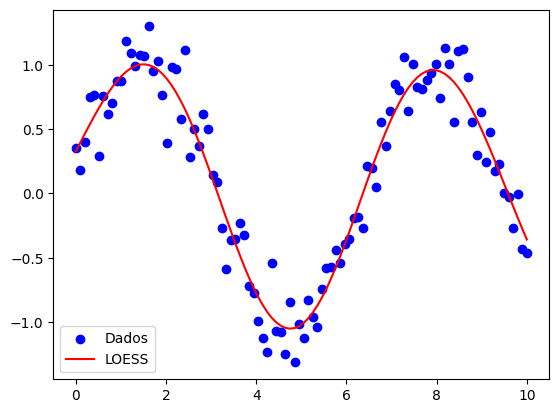

In [22]:
# Imports
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

# Gerar dados de exemplo
np.random.seed(0)
X = np.linspace(0, 10, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Ajustar o modelo LOESS
alpha = 0.1 # Parâmetro de regularização
gamma = 0.1 # Parâmetro do kernel RBF
model = KernelRidge(alpha = alpha, kernel = 'rbf', gamma = gamma)
model.fit(X , y)

# Fazer previsões
X_new = np.linspace(0,10, 100)[:, np.newaxis]
y_pred = model.predict(X_new)

# Plotar os resultados
plt.scatter(X, y, color = 'blue', label = 'Dados')
plt.plot(X_new, y_pred, color = 'red', label = 'LOESS')
plt.legend()
plt.show()

In [23]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy      : 1.26.4
sklearn    : 1.3.2
statsmodels: 0.14.1
matplotlib : 3.8.2



# Fim